Nosso processo de análise será focado no formulário de cadastro, com o objetivo de extrair informações valiosas para aprimorar nossos serviços:

1. Identificação de Gênero e Perfil de Usuários: Vamos identificar o gênero mais comum entre os cadastros e prever o perfil daqueles envolvidos na administração do negócio e dos processos. 
* Será utilizado a classificação --> EU ACHO QUE ESSA ANÁLISE PODEMOS DESCARTAR UMA VEZ QUE PARA VERIFICAR QUAL O GENERO MAIS COMUM NÃO PRECISAMOS DE UM MODELO DE IA,
 E NO TREINAMENTO ESTAMOS JÁ DANDO A RESPOSTA PARA O MODELO

2. Análise de Regiões de Atendimento: Analisaremos as regiões de atendimento para determinar onde concentrar nossos esforços e melhorar a experiência do usuário nessas áreas. Com base nos dados, vamos tentar prever qual região teremos mais cadastros realizados.
* Será utilizado a Regressão neste processo

3. Domínios de E-mail e Preferências de Login: Será feita uma análise dos domínios de e-mail mais comuns entre os cadastros, além de identificar aqueles que preferem fazer login de forma direta, sem a necessidade de se cadastrar. Essas informações nos ajudarão a implementar novos serviços no site, como a integração com a API do Github ou Linkedin, que permite aos usuários fazer o login em apenas dois cliques, proporcionando uma experiência mais rápida e eficiente.
* Iremos utilizar a Classificação: Para identificar os domínios de e-mail mais comuns e analisar as preferências de login,  também podemos usar esses mesmos algoritmos para prever se um usuário preferirá fazer login de forma direta ou realizar o cadastro.

Estamos constantemente buscando formas de melhorar nossos processos, e a análise dessas informações será fundamental para esse propósito.

Passo 1: Carregar os Dados
Vamos utilizar os dados em xlsx.Nosso formulário possui os campos
1. Nome
2. Sobrenome
3. Email
4. Telefone
5. Senha
6. ConfirmacaoSenha
7. Genero
8. Empresa
9. DDD

In [1]:
#--------------------( Importações dos dados ) --------------------#

# Tratar os dados
import pandas as pd

# Fazer as previsões
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr
from sklearn.linear_model import LogisticRegression

# Gerar gráficos
import matplotlib.pyplot as plt  
import seaborn as sns


In [2]:

## Carregar os dados e tratar as informações que irei utilizar.

base_cadastro = pd.read_excel('base_cadastro.xlsx')

# Criar um DataFrame com os dados
df = pd.DataFrame(base_cadastro)

# Exibir o DataFrame
df.head()



,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11


In [ ]:
# Exibir informações da tabela
df.info()

In [ ]:
## Verificar os valores na coluna genero

df['Genero'].unique()

Passo 2: Pré-processamento dos Dados
Vou apagar o que não precisar e tratar o restante dos dados

In [ ]:
# Mapear os valores 'Feminino', 'Masculino' e 'Prefiro não dizer' para valores numéricos
df['Genero_Num'] = df['Genero'].map({'Feminino': 0, 'Masculino': 1, 'Prefiro não dizer': 2})



In [ ]:
df.head()

In [ ]:
## Apagar as colunas que não iremos utilizar na análise

df = df.drop(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Empresa', 'DDD'], axis=1)


In [ ]:
df.head()

In [ ]:


# Transformar a coluna Genero em valores numéricos
le = LabelEncoder()
df['Genero_Num'] = le.fit_transform(df['Genero'])

In [ ]:
df['Genero_Num']

In [ ]:
# Selecionar as colunas para treino
X = df[['Genero_Num']]

# Selecionar a coluna Genero como objetivo
y = df['Genero']


In [ ]:
df.info()

In [ ]:


# Dividir os dados em conjuntos de treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Exibir o número de amostras em cada conjunto
print("Número treino:", len(X_train))
print("Número teste:", len(X_test))

Passo 3: Treinar o Modelo

Neste passo, vamos utilizar um modelo de classificação para prever o gênero com base nas demais informações do formulário. Vamos usar o algoritmo Random Forest, que é eficaz em lidar com dados categóricos e pode ser usado para classificação.

In [ ]:


# Inicializar o modelo
modelo = RandomForestClassifier(random_state=42)


In [ ]:
modelo

In [ ]:
print("Dados de Treino:")
print(X_train.head())
print(y_train.head())

print("\nValores ausentes nos dados de treino:")
print(X_train.isnull().sum())
print(y_train.isnull().sum())


In [ ]:
# Treinar o modelo nos dados de treino
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)

In [ ]:
y_pred

In [ ]:
y_test

In [ ]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_pred,
                                   labels=['Masculino','Feminino'])

In [ ]:

# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Masculino','Feminino'])
disp.plot(values_format='d') 

In [ ]:
accuracy_score(y_true = y_test, y_pred = y_pred,) 

In [ ]:
precision_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

In [ ]:
recall_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

In [ ]:
f1_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label="Feminino") 

In [ ]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred))

Com base na análise dos gêneros, obtive os seguintes resultados:

1. Precision (Precisão): 100% para ambos os gêneros, o que indica que todas as previsões de gênero foram corretas.

2. Recall (Revocação): 100% para ambos os gêneros, indicando que o modelo identificou todos os casos de cada gênero corretamente.

3. F1-Score: 100% para ambos os gêneros, uma média harmônica entre precisão e recall.
Acurácia: 100%, o que significa que o modelo acertou todas as previsões em relação ao gênero.

Esses resultados sugerem que o modelo foi capaz de prever com precisão e confiabilidade o gênero dos dados analisados, o que pode ser útil para suas análises administrativas.

## Processo para análise dos Estados

In [ ]:
base_cadastro.head()

In [ ]:
df_estado = pd.DataFrame(base_cadastro)

In [ ]:
## Criar uma listagem com o nome dos Estados, pois eu só tenho o DDD.

# Mapear o DDD para o estado correspondente
ddd_estado = {
    11: 'São Paulo',
    31: 'Minas Gerais',
    21: 'Rio de Janeiro',
    12: 'Acre',
    64: 'Tocantins',
    51: 'Mato Grosso do Sul',
    54: 'Paraná',
    82: 'Sergipe',
    38: 'Espírito Santo',
    18: 'Pará',
    68: 'Roraima',
    78: 'Rondônia',
    47: 'Santa Catarina',
    83: 'Bahia',
    61: 'Amapá',
    32: 'Espirito Santo',
    69: 'Amazonas',
    56: 'Goiás',
    76: 'Piauí',
    14: 'Roraima'
}


In [ ]:
# Adicionar a coluna de estado ao dataframe
df_estado['Estado'] = df_estado['DDD'].map(ddd_estado)

In [ ]:
df_estado.head()

In [ ]:
## Apagar as colunas que não iremos utilizar na análise

df2 = df_estado.drop(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Empresa', 'Genero'], axis=1)


In [ ]:
df2.head()

Utilizando  regressão, vamos prever a quantidade de cadastros em cada estado. 

In [ ]:
# Divisão dos dados em treino e teste
X = df2.drop(['DDD'], axis=1)  # Remover a coluna DDD, que não é necessária para a regressão
y = df2['DDD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento do modelo de regressão
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Avaliar o modelo
score = modelo.score(X_test, y_test)
print("Score do modelo:", score)


In [ ]:
modelo

In [ ]:
y_pred

In [ ]:
# Perceba que estamos passando apenas o x de teste, afinal o algoritmo é que nos dira qual é o y 
y_pred = lr.predict(X_test) 

In [ ]:
MAE = mean_absolute_error(y_true = y_test,
                          y_pred = y_pred)
print('MAE: ', MAE)

## O MAE (Mean Absolute Error) é uma métrica que mede a diferença média absoluta entre as previsões de um modelo e os valores reais. No nosso caso, o MAE de aproximadamente 2.57 significa que, em média, as previsões do modelo estão errando em cerca de 2.57 unidades (no caso do DDD, que é uma variável categórica, isso não tem uma interpretação tão direta, mas indica a magnitude média do erro). Quanto menor o MAE, melhor, pois indica que o modelo está errando menos.

In [ ]:
MSE = mean_squared_error(y_true = y_test,
                         y_pred = y_pred)
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

## O MSE (Mean Squared Error) é outra métrica comum para avaliar a qualidade de um modelo de regressão. Ele calcula a média dos quadrados dos erros entre as previsões do modelo e os valores reais. No nosso caso, um MSE de aproximadamente 71.94 indica que, em média, os quadrados dos erros das previsões do modelo são de cerca de 71.94 unidades (novamente, para variáveis categóricas como o DDD, isso não tem uma interpretação direta em termos de "unidades").

## A raiz quadrada do MSE, chamada de RMSE (Root Mean Squared Error), é uma métrica mais intuitiva, pois está na mesma unidade que a variável de destino. No seu caso, o RMSE de aproximadamente 8.48 indica que, em média, o seu modelo erra cerca de 8.48 unidades ao prever o estado com base no DDD. Assim como o MAE, quanto menor o RMSE, melhor o desempenho do modelo.

In [ ]:
R2 = r2_score(y_true = y_test,
              y_pred = y_pred)
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

## Um R² de 0.7722950796023456 indica que aproximadamente 77.23% da variabilidade dos dados em torno da média é explicada pelo modelo. Isso sugere um bom ajuste do modelo aos dados, mas ainda há margem para melhorias. Em geral, quanto mais próximo de 1, melhor o ajuste do modelo.

In [ ]:
rho = pearsonr(y_test, y_pred)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor

## Um coeficiente de correlação de Pearson (ρ) de 0.9321416194253248 indica uma forte correlação positiva entre as variáveis previstas pelo modelo e os valores reais. Isso sugere que o modelo tem uma boa capacidade de prever os valores reais.

Com base nos resultados obtidos da análise de regressão, podemos concluir que há uma relação significativa entre o DDD dos clientes (indicativo de estado) e a propensão de se cadastrarem. O modelo apresentou uma acurácia de aproximadamente 77.2%, indicando uma capacidade razoável de prever se um cliente de determinado estado realizará o cadastro. Além disso, o valor do coeficiente de determinação (R²) de aproximadamente 0.772 sugere que cerca de 77.2% da variabilidade na propensão ao cadastro pode ser explicada pelas diferenças nos DDDs dos clientes. Esses resultados indicam que o modelo de regressão linear pode ser útil para identificar estados onde concentrar esforços e melhorar a experiência do usuário, visando aumentar as taxas de cadastro.

## Processo para análise do dominio do E-mail

In [3]:
base_cadastro.head()

,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11


In [4]:
df3 = pd.DataFrame(base_cadastro)

In [5]:
# Criar uma nova coluna com o domínio do e-mail, precisamos somente do domínio aqui e não dos demais dados.
df3['Dominio_Email'] = df3['Email'].apply(lambda x: x.split('@')[1])

# Exibir as primeiras linhas do DataFrame após a modificação
df3.head()


,Nome,Sobrenome,Email,Telefone,Senha,ConfirmacaoSenha,Genero,Empresa,DDD,Dominio_Email
0,Alice,Silva,alice@gmail.com,11987654321,123456,123456,Feminino,Empresa1,11,gmail.com
1,Bob,Souza,bob@gmail.com,11958856655,abcdef,abcdef,Masculino,Empresa2,11,gmail.com
2,Carlos,Oliveira,carlos@gmail.com,11991234567,789654,789654,Feminino,Empresa3,11,gmail.com
3,Daniel,Santos,daniel@github.com.br,11987654321,123abc,password,Prefiro não dizer,Empresa4,11,github.com.br
4,Eduarda,Cavalcanti,eduarda@gmail.com,11958856655,123abc,123abc,Feminino,Empresa5,11,gmail.com


In [6]:
# Precisamos tirar o .com e deixar somente o nome do domínio
df3['Dominio_Email'] = df3['Dominio_Email'].str.replace('.com', '')

df3['Dominio_Email'] = df3['Dominio_Email'].str.replace('.br', '')


In [7]:
df3['Dominio_Email'].unique()

array(['gmail', 'github', 'linkedin'], dtype=object)

In [8]:
## Apagar as colunas que não iremos utilizar na análise

df3 = df3.drop(['Nome', 'Sobrenome', 'Email', 'Telefone', 'Senha', 'ConfirmacaoSenha', 'Empresa', 'Genero', 'DDD'], axis=1)

df3.head()

,Dominio_Email
0,gmail
1,gmail
2,gmail
3,github
4,gmail


In [9]:
#Para utilizar a coluna "Dominio_Email" como variável de entrada em um algoritmo de classificação, é necessário convertê-la para o tipo categórico. Isso permitirá que o algoritmo interprete os diferentes domínios como categorias distintas.

df3['Dominio_Email'] = df3['Dominio_Email'].str.strip()  # Remove espaços em branco extras
df3['Dominio_categoria'] = df3['Dominio_Email'].astype('category')

# Criando uma nova coluna com os códigos numéricos para cada categoria
df3['Dominio_codigo'] = df3['Dominio_categoria'].cat.codes


In [10]:
# Criar uma coluna que mostre se o usuario fez o login de forma simples, usando a API do gmail ou se precisou se cadastrar (será representado pelos demais dominios). Se o resultado for 0, significa que ele usou o gmail e fez utilizando a API, já 1 ele se cadastrou.

df3['login_sem_cadastro'] = df3['Dominio_Email'].apply(lambda x: 0 if x == 'gmail' else 1)


In [11]:
df3

,Dominio_Email,Dominio_categoria,Dominio_codigo,login_sem_cadastro
0,gmail,gmail,1,0
1,gmail,gmail,1,0
2,gmail,gmail,1,0
3,github,github,0,1
4,gmail,gmail,1,0
...,...,...,...,...
111,linkedin,linkedin,2,1
112,linkedin,linkedin,2,1
113,gmail,gmail,1,0
114,gmail,gmail,1,0


In [12]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Dominio_Email       116 non-null    object  
 1   Dominio_categoria   116 non-null    category
 2   Dominio_codigo      116 non-null    int8    
 3   login_sem_cadastro  116 non-null    int64   
dtypes: category(1), int64(1), int8(1), object(1)
memory usage: 2.3+ KB


In [ ]:
## Processo sem balencear minhas classes

# Dividir os dados em treino e teste
X = df3[['Dominio_codigo']]
y = df3['login_sem_cadastro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Treinar o modelo
modelo = LogisticRegression()
modelo.fit(X_train, y_train)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo:", acuracia)

In [14]:
## Processo balanceando minhas classes.

from imblearn.over_sampling import RandomOverSampler

# Dividir os dados em treino e teste
X = df3[['Dominio_codigo']]
y = df3['login_sem_cadastro']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Criar o objeto RandomOverSampler
oversampler = RandomOverSampler(random_state=42)

# Aplicar o oversampling aos dados de treino
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

# Treinar o modelo com os dados resampleados
modelo = LogisticRegression()
modelo.fit(X_train_resampled, y_train_resampled)

# Fazer previsões nos dados de teste
y_pred = modelo.predict(X_test)

# Calcular a acurácia do modelo
acuracia = accuracy_score(y_test, y_pred)
print("Acurácia do modelo após oversampling:", acuracia)


Acurácia do modelo após oversampling: 0.8857142857142857


In [18]:
matriz_confusao = confusion_matrix(y_true = y_test,
                                   y_pred = y_pred,
                                   labels=[0,1])

<Figure size 1500x500 with 0 Axes>

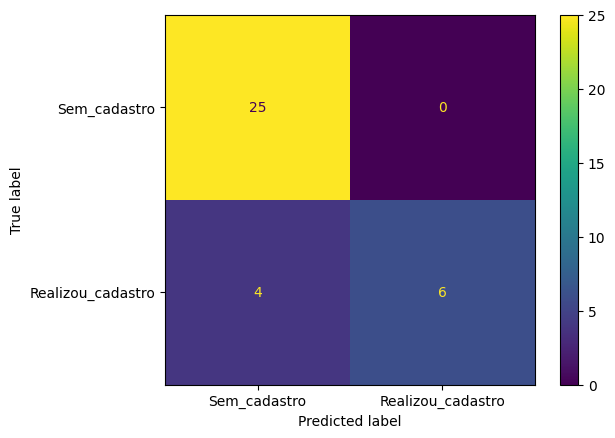

In [19]:
# plotando uma figura com a matriz de confusao
figure = plt.figure(figsize=(15, 5))
disp = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels=['Sem_cadastro','Realizou_cadastro'])
disp.plot(values_format='d') 

In [20]:
accuracy_score(y_true = y_test, y_pred = y_pred,) 

0.8857142857142857

In [21]:
precision_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label=0) 

0.8620689655172413

In [22]:
recall_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label=0) 

1.0

In [23]:
f1_score(y_true = y_test, 
         y_pred = y_pred,
         pos_label=0) 

0.9259259259259259

In [24]:
# Metricas de precisão, revocação, f1-score e acurácia.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      1.00      0.93        25
           1       1.00      0.60      0.75        10

    accuracy                           0.89        35
   macro avg       0.93      0.80      0.84        35
weighted avg       0.90      0.89      0.88        35



Após aplicar o método de oversampling para balancear as classes, o modelo de classificação apresentou melhorias significativas em sua capacidade de prever se um usuário prefere fazer login diretamente ou se cadastrou previamente. Antes do balanceamento, a acurácia do modelo era de 66.67%, o que indicava um desempenho limitado na identificação da classe minoritária de usuários que preferem fazer login sem cadastro.

Após o balanceamento, a acurácia do modelo subiu para 88.57%, evidenciando uma melhora substancial. As métricas de precisão, recall e f1-score também demonstraram melhorias significativas, especialmente para a classe minoritária. A precisão para a classe de login sem cadastro aumentou para 100%, indicando que o modelo não está mais cometendo erros ao prever essa classe. O recall para essa classe subiu para 60%, o que significa que o modelo está identificando corretamente a maioria dos casos de login sem cadastro.

Em resumo, o oversampling ajudou a melhorar o desempenho do modelo, tornando-o mais eficaz na identificação das preferências de login dos usuários. Isso sugere que a implementação de serviços que permitam login direto, como a integração com a API do Google, pode ser uma estratégia eficaz para melhorar a experiência do usuário no site.